In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Dataset\\Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


About Dataset :<br>
There is a big mall in a specific city that contains information of its clients that subscribe to the card they provided their information like their information like gender,age and there annual Income. Since client purchase all sorts of thing in mall and therefore the mall has to purchase history of each client. From there they derived the last column that is spending score.<br>
The closer the score to 1 the lesser the client spends and the closer the score to 100 the greater the client spends.<br>

In [4]:
X = dataset.iloc[:,[3,4]].values

# Elbow Method

The iteration is going to do two things : <br>
1) We will K-Means Algorithm to our data X.<br>
2) We will compute the WCSS(within cluster sum of squares) and append to our list.


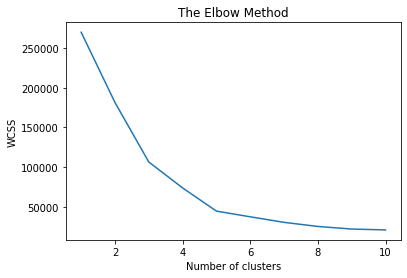

In [5]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init = 'k-means++',max_iter = 300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#plt.figure(figsize=(16, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [6]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

**parametres : <br>**
`init` : The ransom intialisation method. It will make choice for centroid position.(If we choose random then we may fall into random initialisation trap(as discussed earlier).<br>
`max_iter`: The maximum number of iterations there can be to find the final clusters when the k-means algorithm is running. Default value for this parameter is 300.<br>
`n_init` : It is the number of times the k-means algorithm will run with different initial centroids. Default value = 10.<br>
***
**Note** There is another name for **wcss** and that is called **inertia**.Inertia attribute in sklearn package computes wcss.


From above graph graph we can conlude that we need to make 5 clusters.<br>
Next step is to aplly k-Mean algorithm on the dataset with right number of clusters.

In [7]:
#Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)

We are going to use the fit-predict method that returns for each observation which cluster it belongs to. So that means that for every singe client of our dataset the fit predict method is going to tell us the cluster to which the client belongs.<br>
It will return this cluster numbers into a single vector that we are going to call `y-means` 

In [8]:
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

y_means contains the vector which tells that the client belongs to which cluster.

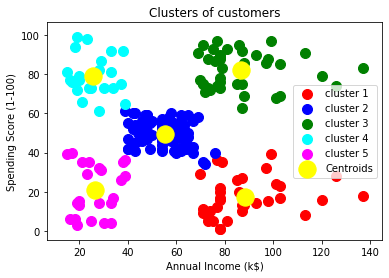

In [10]:
#visualising the clusters 
#plt.figure(figsize=(16, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y_kmeans==0,0],X[y_kmeans ==0,1],s=100,c='red',label = 'cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans ==1,1],s=100,c='blue',label = 'cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans ==2,1],s=100,c='green',label = 'cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans ==3,1],s=100,c='cyan',label = 'cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans ==4,1],s=100,c='magenta',label = 'cluster 5')
#plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

`plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label = 'cluster 1')`<br><br>
when kmeans==0 means that we are talking about dataset belonging to cluster1,`(X[y_kmeans==0,0])` Here second coordinate is 0 i.e. we are selecting 0'th column of data X.<br>
`s` is the size of the datapoints.


`X[y_kmeans==0,1]`<br>
here y_kmeans == 0 means that the dataset that belongs to cluster 1, and second coordinate = 1 which means that we are selecting second column of X.

In [11]:
X[y_kmeans==0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [12]:
X[y_kmeans ==0,1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

`plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')`<br><br>
The above statement is for ploting centroids.<br>
`kmeans.cluster_centers_[:, 0]` -> This atrribute returns coordinates of the centroids.

**Analysing Graph**<br><br>
`Cluster 1` : Clients in cluster 1 have high income and low spending score, So in this cluster clients earn high income but does not spend more money.<br>
`Cluster 2` : Clients in cluster 2 have average income and average spending score.<br>
`Cluster 3` : Clients in cluster 3 have high income and high spending score.They are main potential targets.Owner will try to know what type of products are bought by those clients. <br> 
`Cluster 4` : Clients in cluster 4 have low income and high spending score.<br>
`Cluster 2` : Clients in cluster 2 have low income and low spending score.<br>



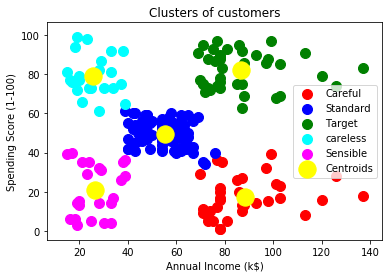

In [13]:
#visualising the clusters 
#plt.figure(figsize=(16, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y_kmeans==0,0],X[y_kmeans ==0,1],s=100,c='red',label = 'Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans ==1,1],s=100,c='blue',label = 'Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans ==2,1],s=100,c='green',label = 'Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans ==3,1],s=100,c='cyan',label = 'careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans ==4,1],s=100,c='magenta',label = 'Sensible')
#plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

y_kmeans == 0, Basically It will be true if it belongs to that cluster.